In [6]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid, linear
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

random.seed(1)


In [7]:
D = pd.read_csv('train.csv')
print(D.head())
matrix = D.to_numpy()
y = matrix[:, 0]
matrix = matrix[:, 1:]

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

(42000, 784)
(42000,)
1
0
1
4


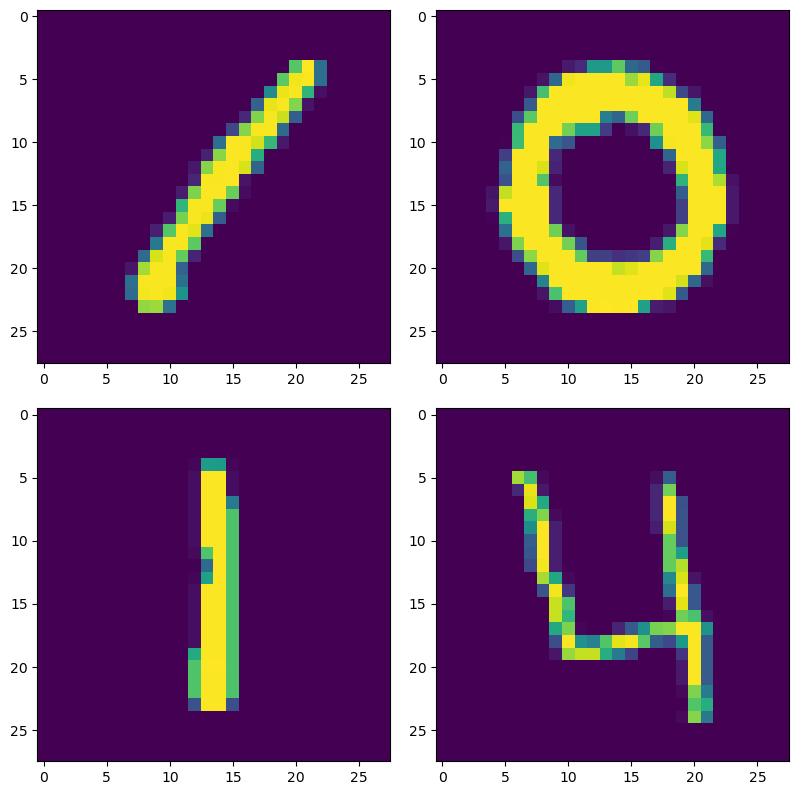

In [8]:
print(matrix.shape)
print(y.shape)

fig, axes = plt.subplots(2, 2, figsize = (8,8))
fig.tight_layout(pad = 0.2)

for i, ax in enumerate(axes.flat):
    reshaped = matrix[i].reshape(28,28)
    ax.imshow(reshaped)
    print(y[i])

In [9]:
#model
model = Sequential([
    tf.keras.Input(shape = (784,)),
    Dense(units = 30, activation = 'relu'),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'linear')
])


In [10]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))

model.fit(matrix, y, epochs = 70)

Epoch 1/70
1313/1313 [==============================] - 5s 3ms/step - loss: 2.4612
Epoch 2/70
1313/1313 [==============================] - 4s 3ms/step - loss: 1.4256
Epoch 3/70
1313/1313 [==============================] - 4s 3ms/step - loss: 1.1331
Epoch 4/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7874
Epoch 5/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5768
Epoch 6/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4408
Epoch 7/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3490
Epoch 8/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2953
Epoch 9/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2510
Epoch 10/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2196
Epoch 11/70
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2015
Epoch 12/70
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1826
E

In [11]:
predictionMatrix = model.predict(matrix)
prediction = np.zeros(42000)

correct = 0
incorrect = 0
list1 = []
list2 = []
list3 = []

for i in range(42000):
    prediction[i] = np.argmax(predictionMatrix[i,:])
    
    if prediction[i] == y[i]:
        correct = correct + 1
    
    else:
        incorrect = incorrect + 1
        list1.append(matrix[i])
        list2.append(y[i])
        list3.append(prediction[i])
        


1313/1313 [==============================] - 3s 2ms/step


In [12]:
print(correct)
print(incorrect)
print(correct/42000)

41568
432
0.9897142857142858


0) 8.0
1) 8.0
2) 3.0
3) 9.0
4) 2.0
5) 7.0
6) 2.0
7) 8.0
8) 6.0
9) 2.0
10) 8.0
11) 5.0
12) 2.0
13) 5.0
14) 6.0
15) 9.0
16) 8.0
17) 8.0
18) 8.0
19) 6.0
20) 8.0
21) 3.0
22) 3.0
23) 0.0
24) 8.0
25) 2.0
26) 8.0
27) 9.0
28) 8.0
29) 3.0
30) 6.0
31) 9.0
32) 8.0
33) 4.0
34) 5.0
35) 8.0


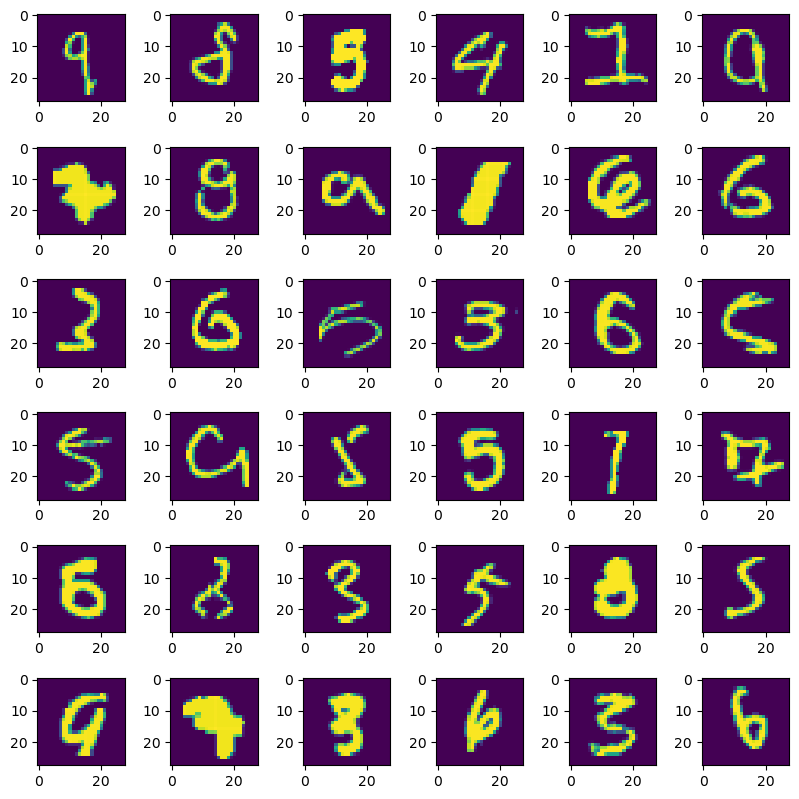

In [19]:
fig, axes = plt.subplots(6, 6, figsize = (8,8))
fig.tight_layout(pad = 0.2)

for i, ax in enumerate(axes.flat):
    reshaped = list1[i].reshape(28,28)
    ax.imshow(reshaped)
    print(str(i) + ") "+ str(list3[i]))